In [9]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import importlib
from modules import base_model as bm 
from modules import obstacles as obs
from modules import run_simulation
importlib.reload(bm); importlib.reload(obs); importlib.reload(run_simulation)

print(f'Imported modules successfully!')

Imported modules successfully!


### Bird Flocking - Incorporating Obstacles
Let's check that we can still run the simulation without any obstacles.

In [10]:
# IDENTICAL to that in toy_problem.ipynb.
# v0, eta, L, dt, Nt, N.
model_params = [0.5, 0.6, 10, 0.2, 200, 100]

# lam_c, lam_a, lam_m, A, R.
strength_params = [0.2, 0.8, 0.4, 0.15, 1.25]

# Disclaimer: we can.
# run_simulation.plot_simulation(model_params, strength_params)

A separate list for obstacle parameters includes:<br>
`obstacle_params = [lam_o, x_obs, y_obs, O]`.

To see if this works, we'll first do a test where $\lambda_o = 0$ - so nothing should change. We'll then do a test for a large value of $\lambda_o$, and hopefully we see the birds avoiding the obstacle without becoming too crazy?

In [11]:
# Let's put an obstacle right in the middle - if L = 10, then at (5, 5)
# Obstacle strength should be much higher than the other velocity updates.

# First test: if the strength is zero, there should be no difference to the
# simulation without any obstacles.
obstacle_params = [0, 5, 5, 1.5]

# Disclaimer: there is no difference, the birds fly right through it.
# run_simulation.plot_simulation_obs(model_params, strength_params, obstacle_params)

MovieWriter ffmpeg unavailable; using Pillow instead.


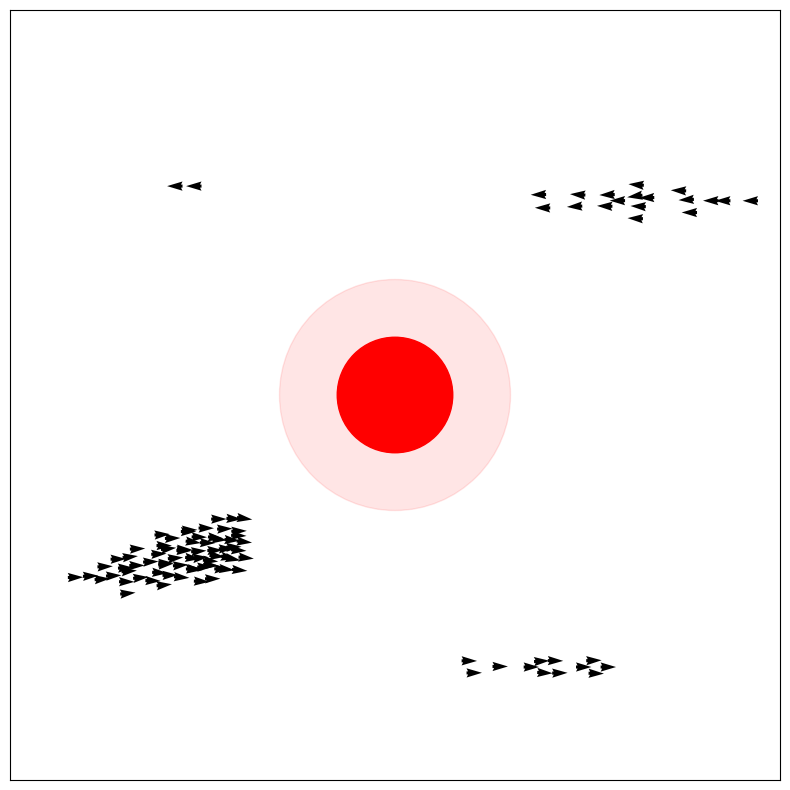

In [ ]:
# First test: if the strength is zero, there should be no difference to the
# simulation without any obstacles.
obstacle_params = [1, 5, 5, 1.5]

# 'save = true' saves the animation as a gif in movies/.
# run_simulation.plot_simulation_obs(model_params, strength_params, obstacle_params, save = True)
run_simulation.plot_simulation_obs(model_params, strength_params, obstacle_params)

### Description of Implementation
I've just added two new functions: `advoid_obstacles()` and a new `step()`. The *only* difference in `step()` is that it include the avoid-obstacle velocity update as well, e.g. `u_vx = vx + vx_c + vx_a + vx_m + vx_o`, where `vx_o` is the velocity update due to the obstacle.

The avoid obstacle function works like this.
1. Initialise an array full of zeros to represent the velocity update due to obstacle advoidance.
2. Determine the distance from the obstacle by calculating the Euclidean distance $\sqrt{(x - x_{obs})^2 + (y - y_{obs})^2}$.
3. If a bird is not within the radius $O$ of the obstacle, do nothing (the velocity update due to the obstacle is zero).
4. If they are within this distance, calculate the repulsion strength away from the obstacle. This is done proportionally to the (inverse) square of the distance - as suggested in the paper. Then update the obstacle-velocity vector in both $x$ and $y$.

Both functions can be found in `modules/obstacles.py`.

### The Run Simulation Function
If you pass `save = True` to `modules/run_simulation()`, it (should) save the animation produced as a gif in `movies/`. The gif is named with a random number.
